##ENSEMBLE
Ensemble models combine several models to improve the overall performance. Usually, the weak learners were combined to boost performance. However, the recent results show that combining several strong approaches can also result in a better performance.

<img src = "https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/creative-assets/s-migr/ul/g/4b/c9/ensemble-learning-bagging.png" width="900">

The goal of ensemble methods is to combine the predictions of several base estimators which build with a given learning algorithm resulting in developing generzlizability and robustness.

Two families of ensemble methods are distinguished by:

**Averaging methods:** build several estimators independently and then average their predictions. Usually, the combined estimator has better performance than any of the single base estimator due to the reduction of variance.

**Boosting methods:** base estimators are built sequentially. The goal is to combine several weak models to produce a powerful ensemble.

we use Ensembling to combine multiple classifiers into a single strong model.
Here, we combine:

LogisticRegression

RandomForestClassifier

DecisionTreeClassifier

using a VotingClassifier.

##Data Description

We use the Breast Cancer Wisconsin dataset from sklearn.datasets.

Features: 30 numeric measurements of cell nuclei, e.g.:

1. mean radius

2. mean texture

3. mean perimeter

4. mean area

5. mean smoothness

… and others

Target:

0 – malignant

1 – benign

##Task

In this project, we will predict whether a tumor is malignant or benign based on these features.

We will:

1. Perform data analysis

2. Train

3. LogisticRegression

4. RandomForestClassifier

5. DecisionTreeClassifier

6. Combine them using VotingClassifier

7. Compare accuracy and classification reports

##Conclusion (Classification)

We used three different algorithms to classify tumors as malignant or benign:

1. LogisticRegression

2. RandomForestClassifier

3. DecisionTreeClassifier

4. VotingClassifier (ensemble of the three)

You will typically see:

**LogisticRegression:** strong baseline, high accuracy

**DecisionTreeClassifier:** may overfit, but still good

**RandomForestClassifier:** very strong performance

**VotingClassifier:** often matches or slightly improves upon the best individual model





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier


##Load the Data

In [ ]:
cancer = load_breast_cancer(as_frame=True)
data = cancer.frame

data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##Data Analysis

Check Class Balance

In [ ]:
data['target'].value_counts()

,count
target,
1,357
0,212


Histogram of a key feature

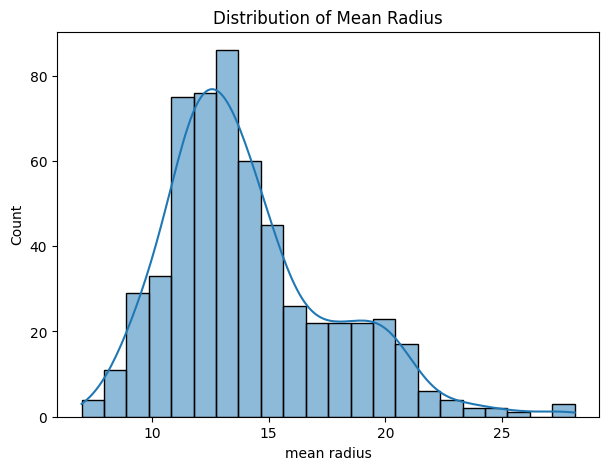

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(data['mean radius'], kde=True)
plt.title("Distribution of Mean Radius")
plt.show()


Correlation heatmap (optional subset)

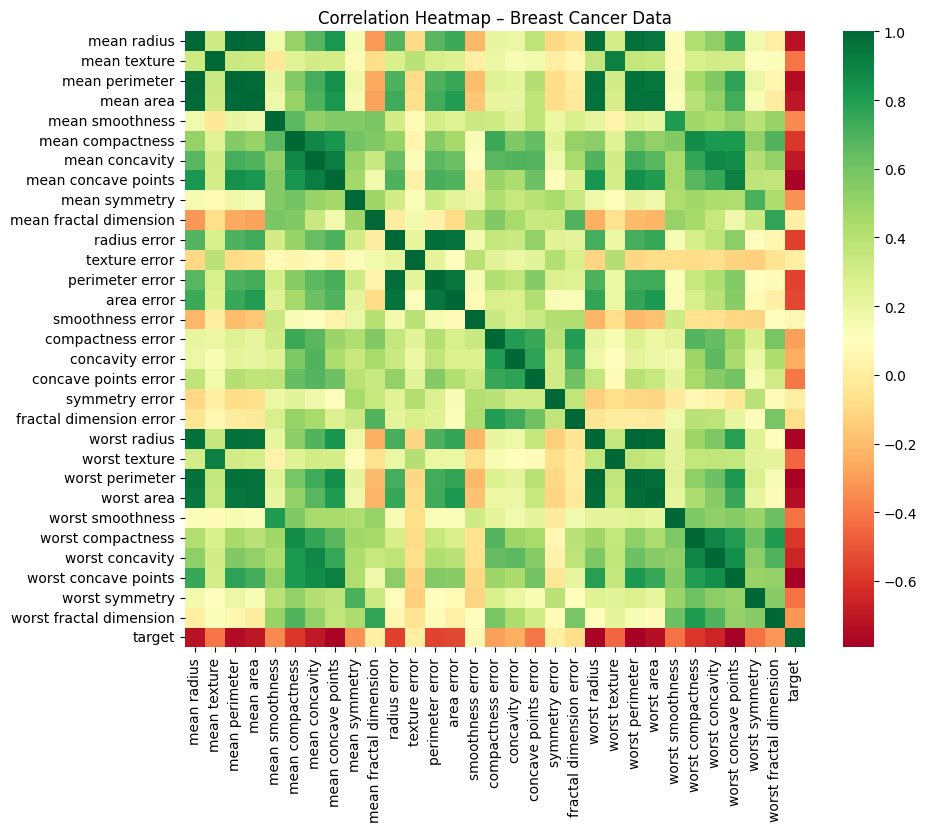

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='RdYlGn')
plt.title("Correlation Heatmap – Breast Cancer Data")
plt.show()


Feature / Target Split

In [ ]:
X = data.drop(columns=['target'])
y = data['target']

print(X.shape, y.shape)


(569, 30) (569,)


Train–Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Train Base Models

In [ ]:
logistic = LogisticRegression(max_iter=5000)
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

logistic.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Evaluate Base Models

In [ ]:
def eval_classifier(name, model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"{name}")
    print(f" Train - Accuracy : {acc_train:.3f}")
    print(f" Test  - Accuracy : {acc_test:.3f}")
    print("-" * 40)

eval_classifier("LogisticRegression", logistic, X_train, y_train, X_test, y_test)
eval_classifier("RandomForestClassifier", rf, X_train, y_train, X_test, y_test)
eval_classifier("DecisionTreeClassifier", dt, X_train, y_train, X_test, y_test)


LogisticRegression
 Train - Accuracy : 0.970
 Test  - Accuracy : 0.947
----------------------------------------
RandomForestClassifier
 Train - Accuracy : 1.000
 Test  - Accuracy : 0.936
----------------------------------------
DecisionTreeClassifier
 Train - Accuracy : 1.000
 Test  - Accuracy : 0.918
----------------------------------------


Ensemble – VotingClassifier

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', logistic),
        ('rf', rf),
        ('dt', dt)
    ],
    voting='hard'
)

for clf in [logistic, rf, dt, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)
    print(f"{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred_clf):.3f}")


LogisticRegression, accuracy score = 0.947
RandomForestClassifier, accuracy score = 0.936
DecisionTreeClassifier, accuracy score = 0.918
VotingClassifier, accuracy score = 0.953


Confusion Matrix & Report (for Ensemble)

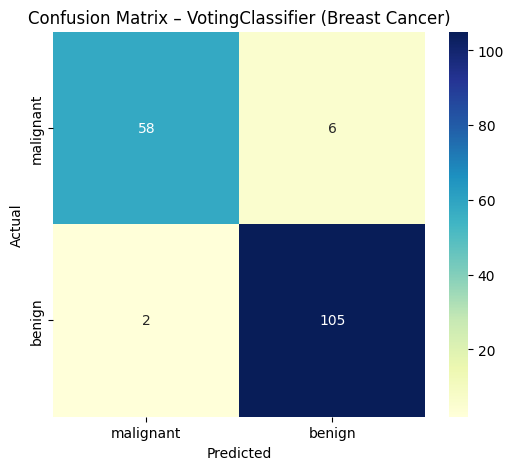

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        64
      benign       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
y_pred_voting = voting_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.title("Confusion Matrix – VotingClassifier (Breast Cancer)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cr = classification_report(y_test, y_pred_voting, target_names=cancer.target_names)
print(cr)
